In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing, load_iris
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder

In [ ]:
plt.style.use('ggplot')
sns.set_palette('deep')

downloading titanic datasheet

In [2]:
try:
    titanic_df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
    print("Titanic dataset loaded successfully from URL.")
except Exception as e:
    print(f"Error loading Titanic dataset from URL: {e}")
    print("Attempting to load from seaborn's library...")
    try:
        titanic_df = sns.load_dataset("titanic")
    except Exception as e_seaborn:
        print(f"Error loading from seaborn as well: {e_seaborn}")
        titanic_df = None # Set to None to prevent further errors

if titanic_df is None:
    print("\n[ERROR] Unable to load Titanic dataset. Please check your internet connection or install seaborn.")


Titanic dataset loaded successfully from URL.


Missing Data Handling:
Load a dataset with some missing values. Try three different methods for handling missing data:

Dropping rows/columns Replacing with mean/median Using KNNImputer or IterativeImputer Compare the results.



In [3]:
print("Initial Missing Values:")
print(titanic_df.isnull().sum())
print("-" * 20)

Initial Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------


Method 1: Dropping Rows/Columns

In [4]:
df_dropped = titanic_df.drop(columns=['Cabin'])
df_dropped.dropna(subset=['Age', 'Embarked'], inplace=True)
print("Shape after Dropping rows/columns:", df_dropped.shape)
print("Missing values after dropping:\n", df_dropped.isnull().sum())
print("-" * 20)

Shape after Dropping rows/columns: (712, 11)
Missing values after dropping:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
--------------------


 Method 2: Replacing with Mean/Median

In [5]:
df_imputed_mean = titanic_df.copy()
median_age = df_imputed_mean['Age'].median()
mean_fare = df_imputed_mean['Fare'].mean()
df_imputed_mean['Age'].fillna(median_age, inplace=True)
df_imputed_mean['Fare'].fillna(mean_fare, inplace=True)
df_imputed_mean['Embarked'].fillna(df_imputed_mean['Embarked'].mode()[0], inplace=True)
print("Missing values after Mean/Median Imputation:\n", df_imputed_mean.isnull().sum())
print("-" * 20)

Missing values after Mean/Median Imputation:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
--------------------


/tmp/ipython-input-1667296710.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed_mean['Age'].fillna(median_age, inplace=True)
/tmp/ipython-input-1667296710.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

Method 3: Using KNNImputer

In [6]:
df_knn_impute = titanic_df[['Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].copy()
imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(imputer.fit_transform(df_knn_impute), columns=df_knn_impute.columns)
print("Missing values after KNNImputer:\n", df_knn_imputed.isnull().sum())

Missing values after KNNImputer:
 Pclass    0
Age       0
Fare      0
SibSp     0
Parch     0
dtype: int64


Scaling Techniques :
Apply Min-Max Scaling and Standard Scaling on the same dataset. Plot the distributions before and after scaling. Which scaling technique is more appropriate for features with outliers?

In [7]:
print("2. Scaling Techniques\n" + "="*30)
california_df = pd.DataFrame(fetch_california_housing(as_frame=True).data,
                             columns=fetch_california_housing().feature_names)
feature_to_scale = 'MedInc'

2. Scaling Techniques


Text(0.5, 0.98, 'Comparison of Scaling Techniques')

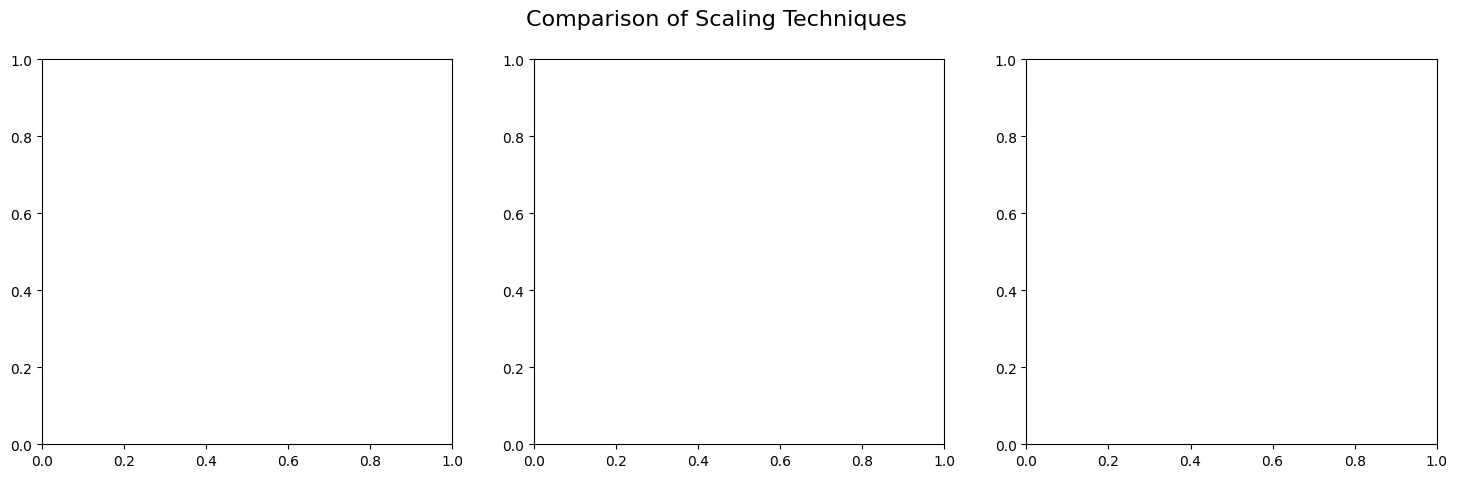

In [8]:
# Plot distributions before and after scaling
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Comparison of Scaling Techniques', fontsize=16)

In [9]:
# Original Distribution
sns.histplot(california_df[feature_to_scale], kde=True, ax=ax1)
ax1.set_title('Original Distribution')
ax1.set_xlabel(feature_to_scale)

Text(0.5, 4.444444444444445, 'MedInc')

In [10]:
# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_min_max_scaled = min_max_scaler.fit_transform(california_df[[feature_to_scale]])
sns.histplot(df_min_max_scaled, kde=True, ax=ax2, color='coral')
ax2.set_title('Min-Max Scaled')
ax2.set_xlabel('Scaled ' + feature_to_scale)

Text(0.5, 4.444444444444445, 'Scaled MedInc')

In [11]:
# Standard Scaling
standard_scaler = StandardScaler()
df_standard_scaled = standard_scaler.fit_transform(california_df[[feature_to_scale]])
sns.histplot(df_standard_scaled, kde=True, ax=ax3, color='forestgreen')
ax3.set_title('Standard Scaled')
ax3.set_xlabel('Scaled ' + feature_to_scale)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<Figure size 640x480 with 0 Axes>

In [12]:
# Conclusion on Scaling
print("Conclusion:")
print("Min-Max Scaling transforms data to a [0, 1] range and is sensitive to outliers.")
print("Standard Scaling transforms data to a mean of 0 and std dev of 1. It is more robust to outliers.")
print("For features with outliers, Standard Scaling is generally more appropriate.\n")


Conclusion:
Min-Max Scaling transforms data to a [0, 1] range and is sensitive to outliers.
Standard Scaling transforms data to a mean of 0 and std dev of 1. It is more robust to outliers.
For features with outliers, Standard Scaling is generally more appropriate.



Label Encoding vs One-Hot Encoding:
Take a categorical feature (e.g., "city" with values Delhi, Mumbai, Chennai). Encode it using both LabelEncoder and OneHotEncoder. Discuss when each should be used.


In [13]:
print("3. Label Encoding vs One-Hot Encoding\n" + "="*30)
df_encoding = titanic_df.dropna(subset=['Embarked']).copy()
embarked_data = df_encoding['Embarked']

3. Label Encoding vs One-Hot Encoding


Label Encoding

In [14]:
le = LabelEncoder()
embarked_label_encoded = le.fit_transform(embarked_data)
print("Label Encoded 'embarked' feature (first 5 values):", embarked_label_encoded[:5])
print("Original categories mapped to integers:", list(le.classes_))
print("-" * 20)

Label Encoded 'embarked' feature (first 5 values): [2 0 2 2 2]
Original categories mapped to integers: ['C', 'Q', 'S']
--------------------


One-Hot Encoding

In [15]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
embarked_one_hot_encoded = ohe.fit_transform(embarked_data.values.reshape(-1, 1))
df_one_hot = pd.DataFrame(embarked_one_hot_encoded, columns=ohe.get_feature_names_out(['embarked']))
print("One-Hot Encoded 'embarked' feature (first 5 rows):")
print(df_one_hot.head())

One-Hot Encoded 'embarked' feature (first 5 rows):
   embarked_C  embarked_Q  embarked_S
0         0.0         0.0         1.0
1         1.0         0.0         0.0
2         0.0         0.0         1.0
3         0.0         0.0         1.0
4         0.0         0.0         1.0


In [16]:
print("\nDiscussion:")
print("Label Encoding assigns a unique integer to each category. It is suitable for ordinal data, where an order exists.")
print("One-Hot Encoding creates a binary column for each category. It is the preferred method for nominal data to avoid misleading a model with a false sense of order.\n")



Discussion:
Label Encoding assigns a unique integer to each category. It is suitable for ordinal data, where an order exists.
One-Hot Encoding creates a binary column for each category. It is the preferred method for nominal data to avoid misleading a model with a false sense of order.



Custom Function for Normalization:
Write a function to manually normalize a feature (0–1 range). Compare its output with MinMaxScaler from sklearn. length.





In [17]:
print("4. Custom Function for Normalization\n" + "="*30)
iris_df = pd.DataFrame(load_iris(as_frame=True).data, columns=load_iris().feature_names)
feature_to_normalize = 'sepal length (cm)'

4. Custom Function for Normalization


Custom Normalization Function

In [18]:

def custom_min_max_scaler(feature):
    """Manually normalizes a pandas Series to a 0-1 range."""
    return (feature - feature.min()) / (feature.max() - feature.min())

# Apply custom function
custom_scaled = custom_min_max_scaler(iris_df[feature_to_normalize])



 sklearn's **MinMaxScaler**

In [19]:

sklearn_scaler = MinMaxScaler()
sklearn_scaled = sklearn_scaler.fit_transform(iris_df[[feature_to_normalize]])



Compare outputs

In [20]:

print("Output from Custom Function (first 5 values):\n", custom_scaled.head())
print("\nOutput from sklearn's MinMaxScaler (first 5 values):\n", sklearn_scaled[:5].flatten())
print("\nAre the outputs identical?", np.allclose(custom_scaled, sklearn_scaled.flatten()))
print("\n")

Output from Custom Function (first 5 values):
 0    0.222222
1    0.166667
2    0.111111
3    0.083333
4    0.194444
Name: sepal length (cm), dtype: float64

Output from sklearn's MinMaxScaler (first 5 values):
 [0.22222222 0.16666667 0.11111111 0.08333333 0.19444444]

Are the outputs identical? True




Imputation with Domain Knowledge: Suppose a "Salary" column has missing values. Instead of mean/median, fill them based on the "Education Level" column (hint: groupby + fillna). Show the steps.

In [21]:
print("5. Imputation with Domain Knowledge\n" + "="*30)
df_domain_impute = titanic_df.copy()
print("Missing values in 'Age' before imputation:", df_domain_impute['Age'].isnull().sum())

# Impute 'Age' based on the median age of each 'Pclass'
df_domain_impute['Age'] = df_domain_impute['Age'].fillna(
  df_domain_impute.groupby('Pclass')['Age'].transform('median')
)

print("Missing values in 'Age' after imputation:", df_domain_impute['Age'].isnull().sum())
print("Median age per class after imputation:\n", df_domain_impute.groupby('Pclass')['Age'].median())
print("\n")


5. Imputation with Domain Knowledge
Missing values in 'Age' before imputation: 177
Missing values in 'Age' after imputation: 0
Median age per class after imputation:
 Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64




Detecting Outliers:
Implement Z-score method to detect outliers in a numeric feature. Compare it with the IQR method for the same feature.

In [22]:
print("6. Detecting Outliers\n" + "="*30)
california_df_outliers = pd.DataFrame(fetch_california_housing(as_frame=True).data,
                                     columns=fetch_california_housing().feature_names)
feature_for_outliers = 'HouseAge'

6. Detecting Outliers


Z-score Method

In [23]:
# Calculate Z-scores for the feature
mean_val = california_df_outliers[feature_for_outliers].mean()
std_dev = california_df_outliers[feature_for_outliers].std()
california_df_outliers['z_score'] = (california_df_outliers[feature_for_outliers] - mean_val) / std_dev

# Find outliers using a threshold of |z-score| > 3
zscore_outliers = california_df_outliers[np.abs(california_df_outliers['z_score']) > 3]
print(f"Number of outliers found by Z-score method in '{feature_for_outliers}':", len(zscore_outliers))
print("-" * 20)


Number of outliers found by Z-score method in 'HouseAge': 0
--------------------


IQR Method

In [24]:
# Calculate Q1, Q3, and IQR
Q1 = california_df_outliers[feature_for_outliers].quantile(0.25)
Q3 = california_df_outliers[feature_for_outliers].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
iqr_outliers = california_df_outliers[(california_df_outliers[feature_for_outliers] < lower_bound) |
                                      (california_df_outliers[feature_for_outliers] > upper_bound)]
print(f"Number of outliers found by IQR method in '{feature_for_outliers}':", len(iqr_outliers))
print("\n")


Number of outliers found by IQR method in 'HouseAge': 0




Feature Engineering :

Create a new feature by combining two existing features in the dataset (e.g., BMI = weight / height²). Normalize and scale the new feature.

In [25]:
print("7. Feature Engineering\n" + "="*30)
df_fe = titanic_df.copy()

# Create 'FamilySize' = SibSp + Parch + 1
df_fe['FamilySize'] = df_fe['SibSp'] + df_fe['Parch'] + 1
print("First 5 values of new 'FamilySize' feature:\n", df_fe['FamilySize'].head())

# Normalize and scale the new feature
fe_scaler = MinMaxScaler()
df_fe['FamilySize_scaled'] = fe_scaler.fit_transform(df_fe[['FamilySize']])
print("\nFirst 5 values of scaled 'FamilySize' feature:\n", df_fe['FamilySize_scaled'].head())

7. Feature Engineering
First 5 values of new 'FamilySize' feature:
 0    2
1    2
2    1
3    2
4    1
Name: FamilySize, dtype: int64

First 5 values of scaled 'FamilySize' feature:
 0    0.1
1    0.1
2    0.0
3    0.1
4    0.0
Name: FamilySize_scaled, dtype: float64
